In [2]:
import cv2 # pip install opencv-python

In [3]:
import matplotlib.pyplot as plt # pip install matplotlib

In [3]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [36]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
Updating files:  25% (906/3487)
Updating files:  26% (907/3487)
Updating files:  27% (942/3487)
Updating files:  28% (977/3487)
Updating files:  29% (1012/3487)
Updating files:  30% (1047/3487)
Updating files:  31% (1081/3487)
Updating files:  32% (1116/3487)
Updating files:  33% (1151/3487)
Updating files:  34% (1186/3487)
Updating files:  35% (1221/3487)
Updating files:  36% (1256/3487)
Updating files:  37% (1291/3487)
Updating files:  38% (1326/3487)
Updating files:  39% (1360/3487)
Updating files:  40% (1395/3487)
Updating files:  41% (1430/3487)
Updating files:  42% (1465/3487)
Updating files:  43% (1500/3487)
Updating files:  43% (1519/3487)
Updating files:  44% (1535/3487)
Updating files:  45% (1570/3487)
Updating files:  46% (1605/3487)
Updating files:  47% (1639/3487)
Updating files:  48% (1674/3487)
Updating files:  49% (1709/3487)
Updating files:  50% (1744/3487)
Updating files:  51% (1779/3487)
Updating files:  52% (1814/3487)
Updating files:  53% (

In [32]:
!pip install tensorflow

In [33]:
!pip install tensorflow-object-detection-api

     -------------------------------------- 577.4/577.4 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 988.1/988.1 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 238.7/238.7 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844499 sha256=05e35e67c53633c87918928bc5970cdb82c6e8611dfb4e3d3690fb0dcb0b3531
  Stored in directory: c:\users\jucille escala\appdata\local\pip\cache\wheels\ce\f8\84\54f82b9b53e64ef3dd0df13ed5fb5f2fdd3479406f58d0cfd8
Successfully built tensorflow-object-detection-api


In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    # classLabels.append(fpt.read())

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000267E9C47170>

# read an image

In [25]:
img = cv2.imread('coffee.png')

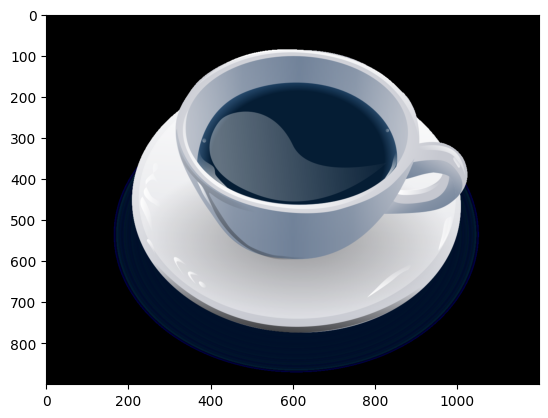

In [11]:
plt.imshow(img) ## bgr

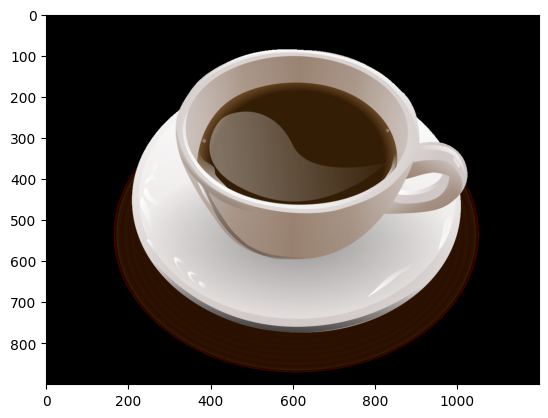

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [26]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [27]:
print(ClassIndex)

[47 67]


In [28]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness =1)
    cv2.rectangle(img,boxes, (255, 0, 0), 2 )
    cv2.putText(img,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )

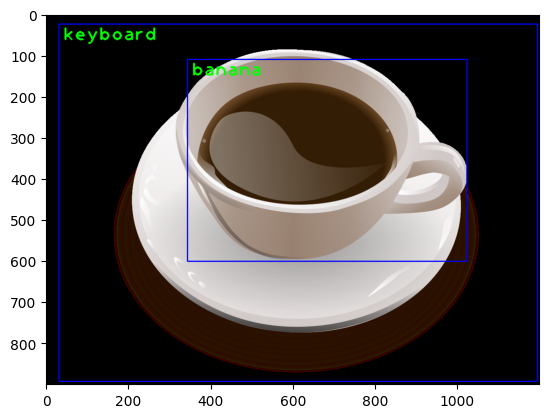

In [29]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [8]:
cap = cv2.VideoCapture('Cars, Busy Streets, City Traffic - No Copyright Royalty Free Stock Videos.mp4')

# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
        
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    #if frame is not None: # Add a check to make sure that the frame is not empty
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold = 0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

    cv2.imshow('yey na ekis na sya yyieee', frame)

    if cv2.waitKey(2) & 0xFF == ord('x'):
        break
    
cap.release()
cv2.destroyAllWindows()

[3 8 3 3 3 3 3 3]
[3 8 3 3 3 3 3 3]
[3 8 3 3 3 3 3 3]
[3 3 8 3 3 3 6 3]
[3 3 3 8 3 6 3 3]
[3 3 3 6 3 3 3 8]
[3 3 3 6 3 8 3]
[3 3 3 8 3 6 3 3]
[3 3 3 8 3 3 3 3 6 3 3 8]
[3 3 8 3 3 3 3 8 3]
[3 3 3 3 8 3 3]
[3 3 3 3 3 8 3]
[3 3 3 3 3 8]
[3 3 3 8 3 3]
[3 3 3 8 3 3]
[3 3 3 3 8 3 3]
[3 3 3 8 3 3]
[3 3 3 3 3 3 8]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3]
[3 3 3 3 3 3 8 6]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 8 3 6]
[3 3 3 3 3 8 3 3 3 3 8]
[3 3 3 3 3 8 3 3 3 8]
[3 3 3 3 3 8 8 3 3 3]
[3 3 3 3 3 8 3 3 3 8 6]
[3 3 3 3 3 8 3 3 3 6]
[3 3 3 3 8 8 3 3 3 3]
[3 3 3 3 3 3 8 3 3 8 6]
[3 3 3 3 3 3 8 3]
[3 3 3 3 3 8 3 8 3]
[3 3 3 3 3 3 8 3 8]
[3 3 3 3 8 3 6 3 3]
[3 3 3 8 6 3 3 3 8]
[3 3 3 8 3 3 6 3]
[3 3 3 3 3 8 6 3 3]
[3 3 3 3 3 6 3]
[3 3 3 3 3 3]
[3 3 3 3 3 6 3]
[3 3 3 3 6 3 8]
[3 3 3 3 3 8 6]
[3 3 3 3 3 8]
[3 3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 6 8 3]
[3 3 3 3 6 8 3 3]
[3 3 3 6 3 3 8 3]
[3 3 3 6 3 3 8 8 3 3 3 3]
[3 3 6 3 3 8 3 3 3 3 8 3]
[3 6 3 3 3 3 8 3 3]


In [30]:
cap = cv2.VideoCapture(1)

# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
        
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    #if frame is not None: # Add a check to make sure that the frame is not empty
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold = 0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3)

    cv2.imshow('lord baka naman help', frame)

    if cv2.waitKey(2) & 0xFF == ord('x'):
        break
    
cap.release()
cv2.destroyAllWindows()

[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[85]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[15  1  1]
[15]
()
[15]
[ 1 15  1]
[15 15  1]
[15  1]
[ 1 15]
[15  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1]
[1 1]
[1 1]
[